In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
#import csv file
wine_data = pd.read_csv('wine.csv')

In [3]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [4]:
#check data types and missing values
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


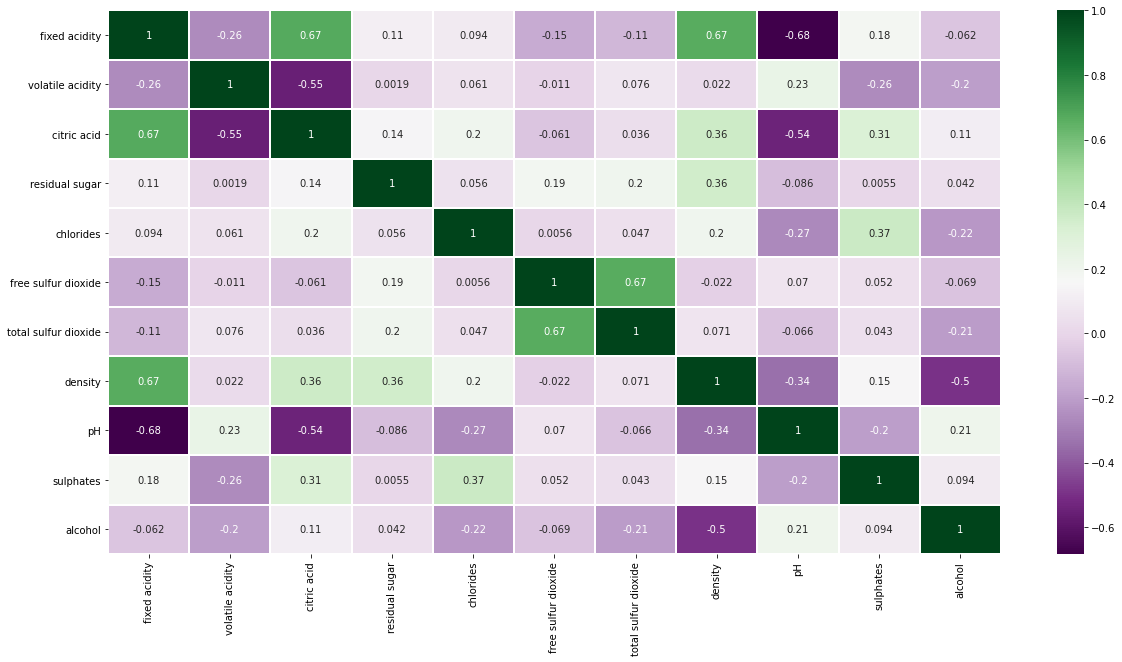

In [5]:
#plot corrlation using heatmap 
plt.figure(figsize=(20,10))
sns.heatmap(wine_data.corr(),annot= True, cmap = 'PRGn', linewidths=1)

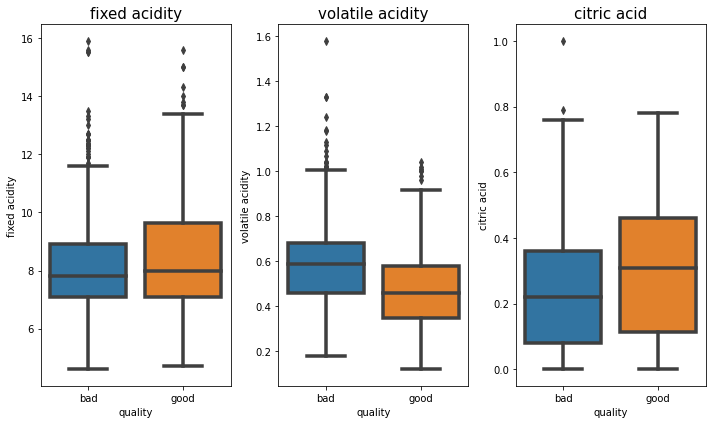

In [6]:
# boxplot for first 3 columns 
fig = plt.figure(figsize=(10,6))
for index,column in enumerate(list(wine_data.columns[:3])):
    plt.subplot(1,3,index+1)
    sns.boxplot(y = wine_data.loc[:, column], x = wine_data["quality"], linewidth=3.5)
    plt.title(column, size = 15)
fig.tight_layout()

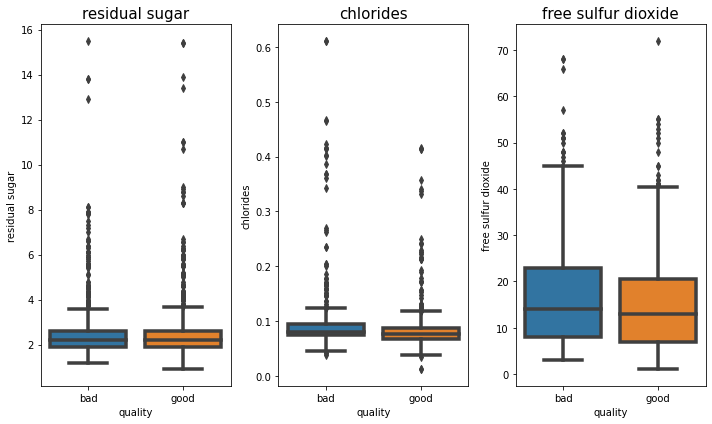

In [7]:
# boxplot for columns 4,5 and 6
fig = plt.figure(figsize=(10,6))
for index,column in enumerate(list(wine_data.columns[3:6])):
    plt.subplot(1,3,index+1)
    sns.boxplot(y = wine_data.loc[:, column], x = wine_data["quality"], linewidth=3.5)
    plt.title(column, size = 15)
fig.tight_layout()

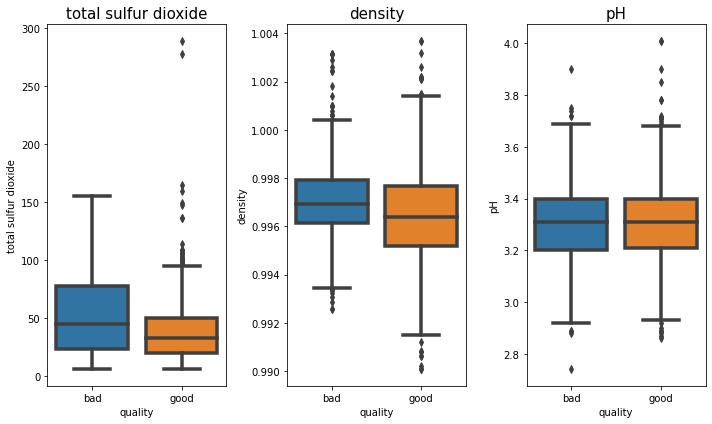

In [8]:
# boxplot for columns 7,8 and 9
fig = plt.figure(figsize=(10,6))
for index,column in enumerate(list(wine_data.columns[6:9])):
    plt.subplot(1,3,index+1)
    sns.boxplot(y = wine_data.loc[:, column], x = wine_data["quality"], linewidth=3.5)
    plt.title(column, size = 15)
fig.tight_layout()

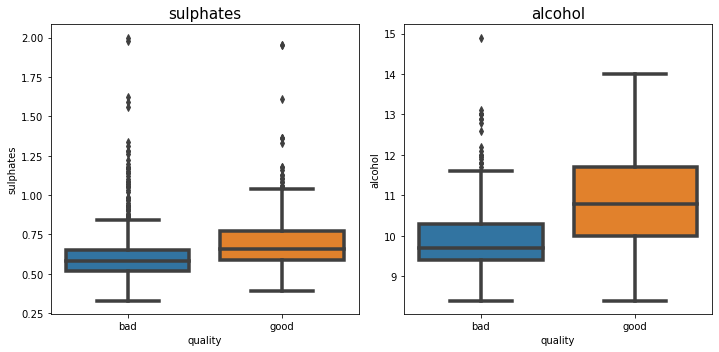

In [9]:
# boxplot for columns 10 and 11
fig = plt.figure(figsize=(15,5))
for index,column in enumerate(list(wine_data.columns[9:11])):
    plt.subplot(1,3,index+1)
    sns.boxplot(y = wine_data.loc[:, column], x = wine_data["quality"], linewidth=3.5)
    plt.title(column, size = 15)
fig.tight_layout()

good    855
bad     744
Name: quality, dtype: int64


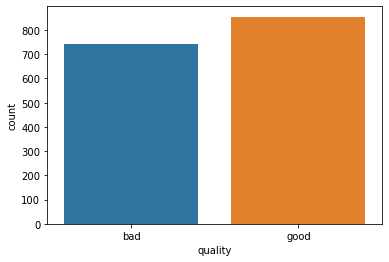

In [10]:
# number of good or bad 
sns.countplot(wine_data["quality"])
print(wine_data.quality.value_counts())

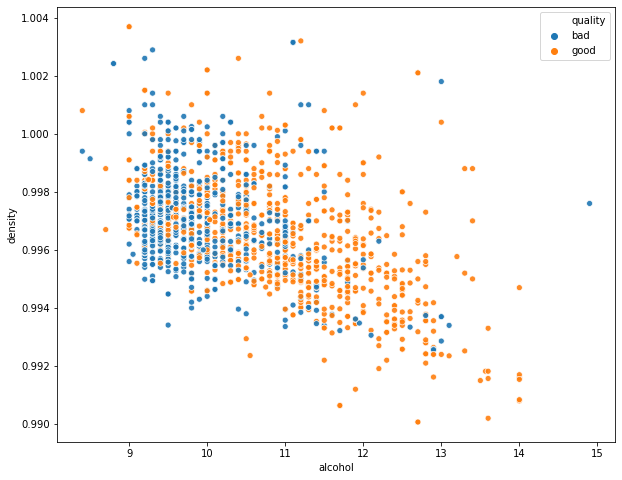

In [11]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = "alcohol", y = "density", hue = "quality",data = wine_data, alpha = 0.9)

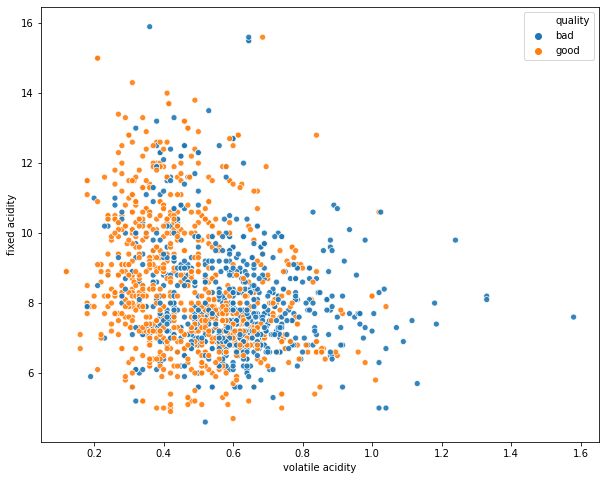

In [12]:
# is there a difference in quality based on volatile or fixed acidity
plt.figure(figsize = (10,8))
sns.scatterplot(x = "volatile acidity", y = "fixed acidity", hue = "quality",data = wine_data, alpha = 0.9)

In [13]:
#select features and target
x = wine_data.drop('quality', axis = 1).values
y = wine_data['quality'].values

In [14]:
#scale features 
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

In [15]:
#split data to train and test subsets
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=.20, random_state=1)

## Logistic Regression Algorithm

In [16]:
# create object for LogisticRegression and train algorithm 
LR = LogisticRegression(solver='liblinear', random_state=1).fit(train_x, train_y)

In [17]:
# make predction using test set 
pred = LR.predict(test_x)
pred

array(['bad', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'bad', 'good', 'bad', 'bad', 'good', 'good', 'bad', 'good',
       'bad', 'good', 'bad', 'good', 'good', 'bad', 'good', 'bad', 'good',
       'good', 'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'bad',
       'good', 'bad', 'bad', 'good', 'bad', 'good', 'bad', 'bad', 'good',
       'bad', 'good', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'good',
       'bad', 'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'bad',
       'bad', 'bad', 'bad', 'bad', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'bad',
       'good', 'bad', 'good', 'bad', 'good', 'good', 'bad', 'good', 'bad',
       'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'bad', 'bad',
       'good', 'bad', 'bad', 'bad', 'bad', 'bad',

In [18]:
LR.predict_proba(test_x)

array([[0.50830015, 0.49169985],
       [0.67017691, 0.32982309],
       [0.15051706, 0.84948294],
       [0.3836143 , 0.6163857 ],
       [0.03114367, 0.96885633],
       [0.18234315, 0.81765685],
       [0.13842424, 0.86157576],
       [0.85338858, 0.14661142],
       [0.21228295, 0.78771705],
       [0.67551263, 0.32448737],
       [0.10925638, 0.89074362],
       [0.63649311, 0.36350689],
       [0.52132812, 0.47867188],
       [0.06626635, 0.93373365],
       [0.43039062, 0.56960938],
       [0.64954133, 0.35045867],
       [0.17927987, 0.82072013],
       [0.58918209, 0.41081791],
       [0.47940043, 0.52059957],
       [0.61402986, 0.38597014],
       [0.44571559, 0.55428441],
       [0.13304983, 0.86695017],
       [0.65048221, 0.34951779],
       [0.08857211, 0.91142789],
       [0.68365975, 0.31634025],
       [0.08420048, 0.91579952],
       [0.17442226, 0.82557774],
       [0.46239537, 0.53760463],
       [0.71325039, 0.28674961],
       [0.76926097, 0.23073903],
       [0.

In [19]:
# Evaluation
print('Accuracy Score:', accuracy_score(test_y, pred))
print(classification_report(test_y, pred))
print('confusion matrix:')
print(confusion_matrix(test_y, pred))

Accuracy Score: 0.75
              precision    recall  f1-score   support

         bad       0.74      0.74      0.74       154
        good       0.76      0.76      0.76       166

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320

confusion matrix:
[[114  40]
 [ 40 126]]


## KNeighborsClassifier Algorithm

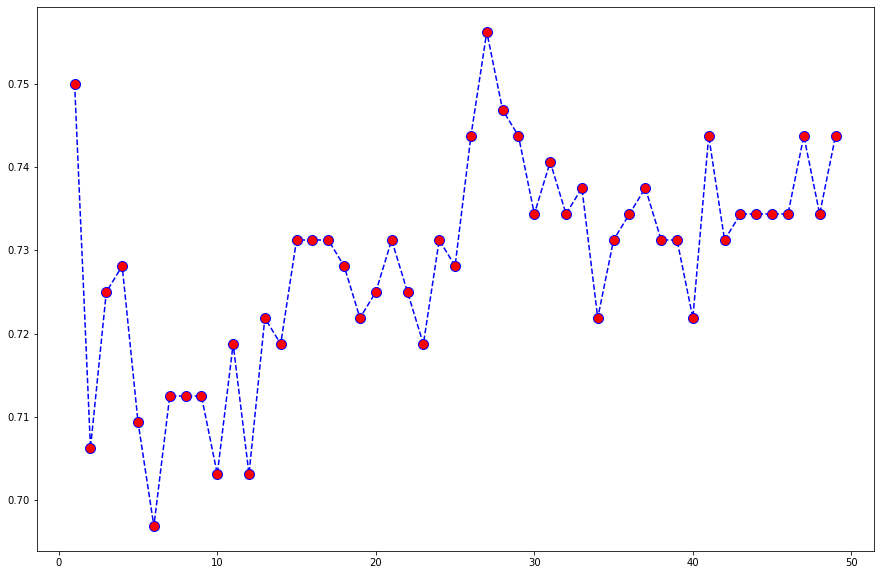

In [20]:
#finding the max accuracy score and its corresponding k value
acc = []
for i in range(1,50):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(train_x,train_y)
    wpred = neigh.predict(test_x)
    acc.append(accuracy_score(test_y, wpred))
plt.figure(figsize=(15,10))
plt.plot(range(1,50),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)

In [36]:
# not the best accuracy_score better mesurment 
knn = KNeighborsClassifier()
p_g = {'n_neighbors': range(1,50)}
knngs = GridSearchCV(knn, p_g, cv=5)
knngs.fit(train_x,train_y)
print(knngs.best_params_)
print(knngs.best_score_)

{'n_neighbors': 1}
0.7443290441176471


In [22]:
# Optimal K value found is 27, create object for KNeighborsClassifier and fit model 
k = 27
neigh2 = KNeighborsClassifier(n_neighbors = k).fit(train_x,train_y)
wpred2 = neigh2.predict(test_x)

In [23]:
# Evaluation
print('Optimal K value is 27 with an accuracy score of:', accuracy_score(test_y, wpred2))
print(classification_report(test_y, wpred2))
print(wpred2[0:5])
print(test_y[0:5])

Optimal K value is 27 with an accuracy score of: 0.75625
              precision    recall  f1-score   support

         bad       0.75      0.74      0.75       154
        good       0.76      0.77      0.77       166

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.76      0.76      0.76       320

['good' 'bad' 'good' 'good' 'good']
['bad' 'good' 'good' 'good' 'good']


## Random Forest Classifier Algorithm

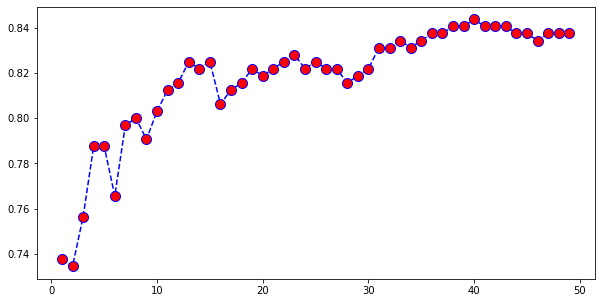

In [24]:
# finding optimal n_estimators score using graph 
n_estimators = []
for i in range(1,50):
    RF = RandomForestClassifier(n_estimators = i, random_state=1)
    RF.fit(train_x, train_y)
    rfpred = RF.predict(test_x)
    n_estimators.append(accuracy_score(test_y, rfpred))
plt.figure(figsize=(10,5))
plt.plot(range(1,50),n_estimators,color ='blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)

In [25]:
# optimal n_estimators find is 40 now create object for RandomForestClassifier and fit model 
n_estimators = 40
RF2 = RandomForestClassifier(n_estimators, random_state=1)
RF2.fit(train_x, train_y)
rfpred2 = RF2.predict(test_x)

In [42]:
# not the best accuracy_score better mesurment 
rfc = RandomForestClassifier()
p_g2 = {'n_estimators': range(1,50)}
knngs2 = GridSearchCV(rfc, p_g2, cv=5)
knngs2.fit(train_x,train_y)
print(knngs2.best_params_)
print(knngs2.best_score_)

{'n_estimators': 47}
0.810765931372549


#### Prediction

In [26]:
test_x[:1]

array([[ 0.27598301, -0.65820153,  1.8949573 , -0.24037503,  0.11760659,
        -0.65745405, -0.13586095,  0.98228542,  1.48302126,  0.01092425,
         0.07229363]])

In [27]:
test_y[:1]

array(['bad'], dtype=object)

In [28]:
RF2.predict([[0.27598301, -0.65820153,  1.8949573 , -0.24037503,  0.11760659,
        -0.65745405, -0.13586095,  0.98228542,  1.48302126,  0.01092425,
         0.07229363]])

array(['bad'], dtype=object)

In [29]:
x[100:101]

array([[-0.01128221,  0.45909378,  0.14904159, -0.31132282, -0.07367691,
        -0.46619252,  0.10741079,  0.24026625,  0.57592232, -0.28414114,
        -0.20930812]])

In [30]:
y[100:101]

array(['good'], dtype=object)

In [31]:
RF2.predict([[-0.01128221,  0.45909378,  0.14904159, -0.31132282, -0.07367691,
        -0.46619252,  0.10741079,  0.24026625,  0.57592232, -0.28414114,
        -0.20930812]])

array(['good'], dtype=object)

In [32]:
# Evaluation
print('Accuracy Score:', accuracy_score(test_y, rfpred2))
print(classification_report(test_y, rfpred2))
print('Confusion Matrix')
print(confusion_matrix(test_y, rfpred2))

Accuracy Score: 0.84375
              precision    recall  f1-score   support

         bad       0.84      0.84      0.84       154
        good       0.85      0.85      0.85       166

    accuracy                           0.84       320
   macro avg       0.84      0.84      0.84       320
weighted avg       0.84      0.84      0.84       320

Confusion Matrix
[[129  25]
 [ 25 141]]


In [33]:
pr = pd.DataFrame(columns=["rfpred2","test_y"], index= None)
pr["rfpred2"] = rfpred2
pr["test_y"] = test_y
pr.head(15)

,rfpred2,test_y
0,bad,bad
1,bad,good
2,good,good
3,good,good
4,good,good
5,good,good
6,good,good
7,bad,bad
8,good,bad
9,bad,bad
